### 模型训练过程

<img width=60% height=60% src="imgs/17/01.png" alt="imgs/17/01.png" title="图1" />

### 学习率（learning rate）

学习率与损失值变化（模型收敛速度）直接相关。

何时加大学习率

- 训练初期，损失值一直没有什么波动

何时减小学习率

- 训练初期，损失值直接爆炸或者NAN
- 损失值先开始速降，后平稳多时
- 训练后期，损失值反复上下波动

<img width=30% height=30% src="imgs/17/02.png" alt="imgs/17/02.png" title="图2" />

### 优化器介绍：SGD（Stochastic Gradient Descent）

<img width=75% height=75% src="imgs/17/03.png" alt="imgs/17/03.png" title="图3" />

### 优化器介绍：SGD-M（Momentum）

SGD在遇到沟壑时容易陷入震荡。为此，可以为其引入动量（Momentum），加速SGD在正确方向的下降并抑制震荡。

<img width=70% height=70% src="imgs/17/04.png" alt="imgs/17/04.png" title="图4" />

### 优化器介绍：Adagrad - RMSprop - Adam

<img width=30% height=30% src="imgs/17/05.png" alt="imgs/17/05.png" title="图5" />

<img width=40% height=40% src="imgs/17/06.gif" alt="imgs/17/06.gif" title="图6" />

### 优化器对比：鞍点

<img width=40% height=40% src="imgs/17/07.gif" alt="imgs/17/07.gif" title="图7" />

### 优化器对比：验证码识别模型

<img width=60% height=60% src="imgs/17/08.png" alt="imgs/17/08.png" title="图8" />

<img width=60% height=60% src="imgs/17/09.png" alt="imgs/17/09.png" title="图9" />

### 模型训练过程分析

In [1]:
# import libs
import glob
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load training history files
history_file = './history/16/captcha_adam_binary_crossentropy_bs_100_epochs_10.history'
with open(history_file, 'rb') as f:
    history = pickle.load(f)

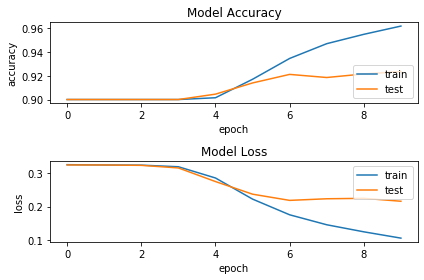

In [3]:
# show training process
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

plt.show()

In [2]:
# defind showing training process method
def plot_training(history=None, metric='acc', title='Model Accuracy', loc='lower right'):
    model_list = []
    fig = plt.figure(figsize=(10, 8))
    for key, val in history.items():
        model_list.append(key.replace(HISTORY_DIR, '').rstrip('.history'))
        plt.plot(val[metric])
        
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(model_list, loc=loc)
    plt.show()

In [3]:
# load training model datas
HISTORY_DIR = './history/16/'
history={}
for filename in glob.glob(HISTORY_DIR + '*.history'):
    with open(filename, 'rb') as f:
        history[filename] = pickle.load(f)

In [4]:
for key, val in history.items():
    print(key.replace(HISTORY_DIR, '').rstrip('.history'), val.keys())

captcha_adadelta_binary_crossentropy_bs_100_epochs_30 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
captcha_adagrad_binary_crossentropy_bs_100_epochs_30 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
captcha_adam_binary_crossentropy_bs_100_epochs_10 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
captcha_adam_binary_crossentropy_bs_100_epochs_30 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
captcha_rmsprop_binary_crossentropy_bs_100_epochs_30 dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


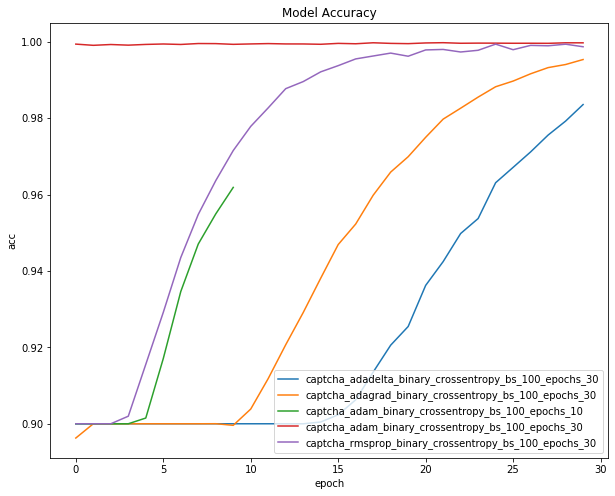

In [5]:
# show acc on train datas
plot_training(history)

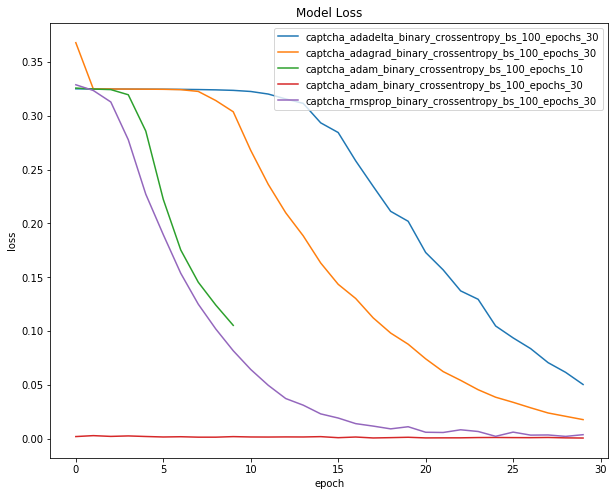

In [6]:
# show model loss on train datas
plot_training(history, metric='loss', title='Model Loss', loc='upper right')

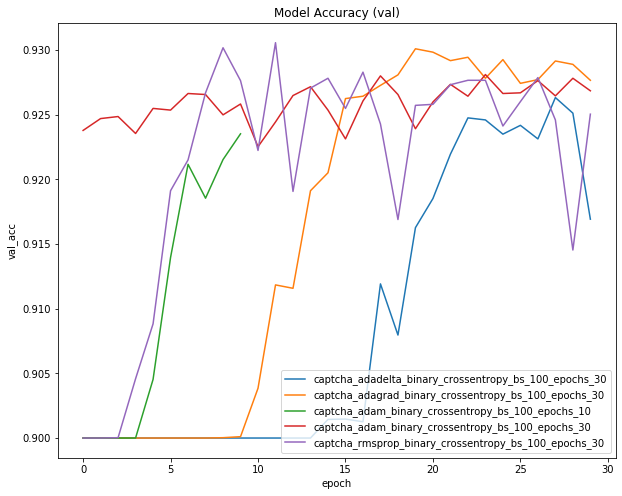

In [7]:
# show acc on test datas
plot_training(history, metric='val_acc', title='Model Accuracy (val)')

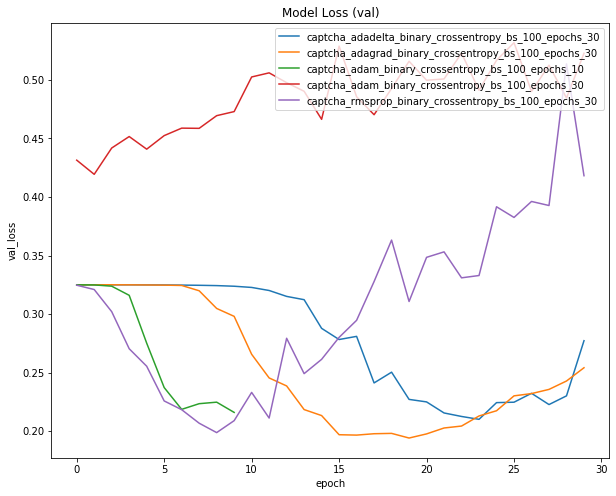

In [8]:
# show model loss on test datas
plot_training(history, metric='val_loss', title='Model Loss (val)', loc='upper right')